<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB13.%20Classifyng%20Cancer%20cells%20with%20YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Cancer cells with YoloV8

## 1. Introduction

Blood cancer, specifically Acute Lymphoblastic Leukemia (ALL) (see NB1), is a critical area of research due to its aggressive nature and impact on both pediatric and adult populations. The classification of blood cancer cells into different stages and types is essential for accurate diagnosis and treatment planning. Deep learning has emerged as a powerful tool in this domain, offering unprecedented accuracy and efficiency in classifying blood cancer cells based on microscopic images or other diagnostic data.

### Importance of Deep Learning in Blood Cancer Classification

Deep learning, particularly Convolutional Neural Networks (CNNs), has revolutionized the field of medical image analysis, including the classification of blood cancer cells. Traditional methods of cancer diagnosis involve manual inspection by pathologists, which can be time-consuming and subject to human error. Deep learning models, trained on large datasets of labeled images, can automatically identify and classify different types of blood cancer cells with high accuracy, thus assisting in early diagnosis and personalized treatment plans. This automated process not only speeds up the diagnostic process but also enhances the reliability of the results, which is crucial in life-threatening conditions like ALL.

### Classes in the Dataset

1. **Benign**: This class represents normal, non-cancerous blood cells. In the context of diagnosis, distinguishing benign cells from malignant ones is crucial as it helps in identifying the progression of the disease.

2. **[Malignant] early Pre-B**: This class includes malignant cells that are in the early stage of the Pre-B cell phase. Pre-B cells are immature B cells, and when these cells become malignant, they proliferate uncontrollably. Early detection of these cells is vital for starting treatment before the cancer advances.

3. **[Malignant] Pre-B**: This category involves malignant cells in a more developed Pre-B stage. The presence of these cells indicates a progression of the leukemia, and identifying them accurately helps in staging the disease and tailoring the treatment.

4. **[Malignant] Pro-B**: These are the most immature form of B cells that have turned malignant. Pro-B cells are an early stage in B cell development, and their malignancy is a strong indicator of aggressive leukemia. Accurate classification of these cells can be crucial in determining a more intensive treatment approach.

### Resources

1. **Deep Learning in Cancer Classification**: The application of deep learning in medical imaging has shown significant improvements in the classification and detection of various cancers, including ALL. This study demonstrates how CNNs can outperform traditional methods in detecting and classifying blood cancer cells [Source](https://www.nature.com/articles/s41598-019-42915-5).

2. **Importance of Early Detection**: The importance of detecting early-stage malignant cells, such as those in the Pre-B or Pro-B stages, is well-documented. Early intervention can significantly improve patient outcomes, as outlined in this research on ALL prognosis and treatment [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4962510/).

3. **Automated Classification Systems**: Automated systems using deep learning have been increasingly adopted in clinical settings, proving their value in reducing diagnostic times and increasing accuracy, especially in diseases like leukemia [Source](https://www.frontiersin.org/articles/10.3389/fonc.2020.00477/full).

The integration of deep learning in the classification of blood cancer cells represents a major advancement in oncology, offering precision, speed, and scalability that surpasses traditional diagnostic methods. Understanding and differentiating between benign and various malignant stages of B cell development is crucial for effective treatment planning, making this area of research both significant and impactful.Blood cancer, specifically Acute Lymphoblastic Leukemia (ALL), is a critical area of research due to its aggressive nature and impact on both pediatric and adult populations. The classification of blood cancer cells into different stages and types is essential for accurate diagnosis and treatment planning. Deep learning has emerged as a powerful tool in this domain, offering unprecedented accuracy and efficiency in classifying blood cancer cells based on microscopic images or other diagnostic data.

## 2. Setting kaggle up

---
**Install Kaggle API Library**

---

In [1]:
%pip install -q kaggle

---

**Upload your Kaggle API Key**

---

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


---

**Copy the API key to `~/.kaggle`**

---

In [3]:
%mkdir -p ~/.kaggle
%cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~

total 72
drwx------ 1 root root 4096 Aug 14 10:50 .
drwxr-xr-x 1 root root 4096 Aug 14 10:46 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Aug 12 13:45 .cache
drwxr-xr-x 3 root root 4096 Aug 12 13:45 .config
drwxr-xr-x 5 root root 4096 Aug 12 13:44 .ipython
drwx------ 1 root root 4096 Aug 12 13:44 .jupyter
drwxr-xr-x 2 root root 4096 Aug 14 10:50 .kaggle
drwxr-xr-x 2 root root 4096 Aug 14 10:46 .keras
drwx------ 3 root root 4096 Aug 12 13:15 .launchpadlib
drwxr-xr-x 1 root root 4096 Aug 12 13:44 .local
drwxr-xr-x 4 root root 4096 Aug 12 13:44 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Aug 12 13:44 .wget-hsts


---
**List Kaggle datasets**

---

In [4]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                   Healthcare Dataset (2019-2024)                       3MB  2024-08-09 17:52:25           1896         37  1.0              
muhammadehsan000/global-electric-vehicle-sales-data-2010-2024   Global Electric Vehicle Sales Data (2010-2024)      83KB  2024-08-09 16:39:22           1470         24  1.0              
myrios/cost-of-living-index-by-country-by-number-2024           Cost of Living Index by Country                      3KB  2024-07-19 06:25:42           4456         66  1.0              
abdallahwagih/company-employees                                 C

---

**Filter a list of kaggle datasets `search` blood**


---

In [5]:
!kaggle datasets list -s "blood"

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
paultimothymooney/blood-cells                                Blood Cell Images                           108MB  2018-04-21 21:06:13          43064        843  0.7058824        
whenamancodes/blood-transfusion-dataset                      Blood Transfusion Dataset                     3KB  2022-09-30 04:35:43           5031         68  1.0              
abdallahwagih/retina-blood-vessel                            Retina Blood Vessel                          33MB  2023-08-17 13:35:15           2091         73  0.75             
adhoppin/blood-cell-detection-datatset                       Blood Cell Detection Datatset                12MB  202

---

**Download `mohammadamireshraghi/blood-cell-cancer-all-4class ` dataset**

---

In [6]:
!kaggle datasets download -d mohammadamireshraghi/blood-cell-cancer-all-4class --unzip --force

Dataset URL: https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 1.68G/1.68G [01:43<00:00, 20.7MB/s]
100% 1.68G/1.68G [01:43<00:00, 17.4MB/s]


---
**Display tree datset directory**

---

In [7]:
# Install Pip Tree globally

!sudo apt install tree -q

!tree --dirsfirst -L 1  "Blood cell Cancer [ALL]"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (70.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123594 files and directories currently installed.)
Preparing

In [8]:
!rm -rf "datasets"

---
**Organize your dataset directory for YOLOv8**

---

In [9]:


import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
original_dataset_dir = 'Blood cell Cancer [ALL]'
base_dir = 'datasets/BloodCellCancer'

# Define new paths for train, val, and test
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List the classes
classes = ['Benign', '[Malignant] early Pre-B', '[Malignant] Pre-B', '[Malignant] Pro-B']

# Function to copy images
def copy_images(class_name, src_dir, train_dst, val_dst, test_dst, train_ratio=0.7, val_ratio=0.15):
    # List all images in the class
    images = os.listdir(src_dir)
    images = [os.path.join(src_dir, img) for img in images if img.endswith('.jpg')]

    # Split into train, val, and test
    train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=val_ratio/(val_ratio + (1 - train_ratio)), random_state=42)

    # Create class directories in train, val, and test
    train_class_dir = os.path.join(train_dst, class_name.replace('[Malignant] ', 'Malignant '))
    val_class_dir = os.path.join(val_dst, class_name.replace('[Malignant] ', 'Malignant '))
    test_class_dir = os.path.join(test_dst, class_name.replace('[Malignant] ', 'Malignant '))
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy images
    for img in train_images:
        shutil.copy(img, train_class_dir)

    for img in val_images:
        shutil.copy(img, val_class_dir)

    for img in test_images:
        shutil.copy(img, test_class_dir)

    # Return one image from train, val, and test for display
    return train_images[0], val_images[0], test_images[0]

# Dictionaries to store image paths for each class
train_sample_images = {}
val_sample_images = {}
test_sample_images = {}

# Copy images for each class and get a sample image from each class
for class_name in classes:
    src_dir = os.path.join(original_dataset_dir, class_name)
    train_img, val_img, test_img = copy_images(class_name, src_dir, train_dir, val_dir, test_dir)
    train_sample_images[class_name] = train_img
    val_sample_images[class_name] = val_img
    test_sample_images[class_name] = test_img

print("Dataset reorganized successfully")



Dataset reorganized successfully


---
**Display tree dataset directory**

---

In [10]:
!tree --dirsfirst -L 3  "datasets"

datasets
└── BloodCellCancer
    ├── test
    │   ├── Benign
    │   ├── Malignant early Pre-B
    │   ├── Malignant Pre-B
    │   └── Malignant Pro-B
    ├── train
    │   ├── Benign
    │   ├── Malignant early Pre-B
    │   ├── Malignant Pre-B
    │   └── Malignant Pro-B
    └── val
        ├── Benign
        ├── Malignant early Pre-B
        ├── Malignant Pre-B
        └── Malignant Pro-B

16 directories, 0 files


## 3. **Displaying some samples from the Dataset**

---
**Display some train, val y test images**

---

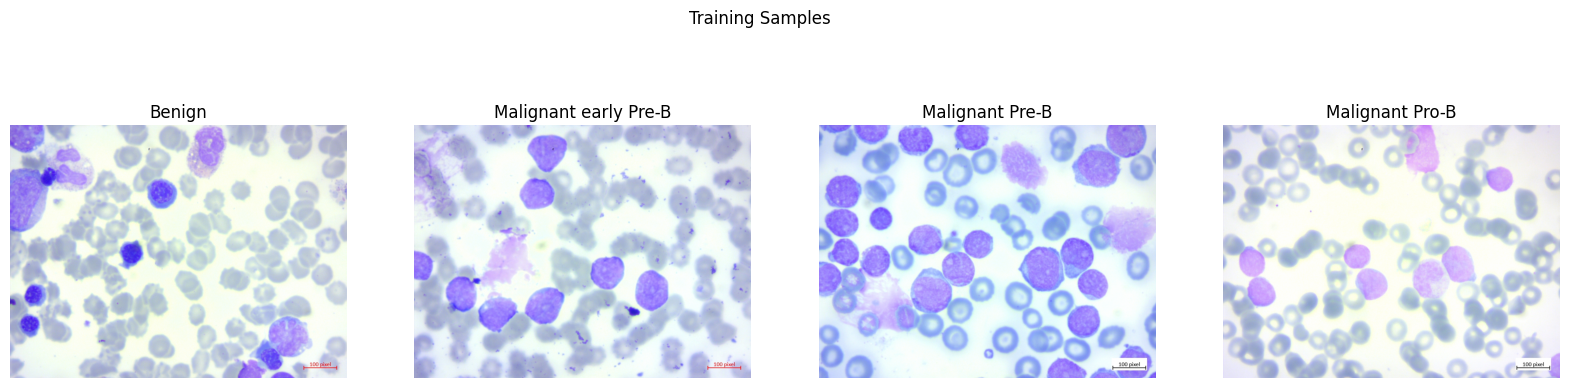

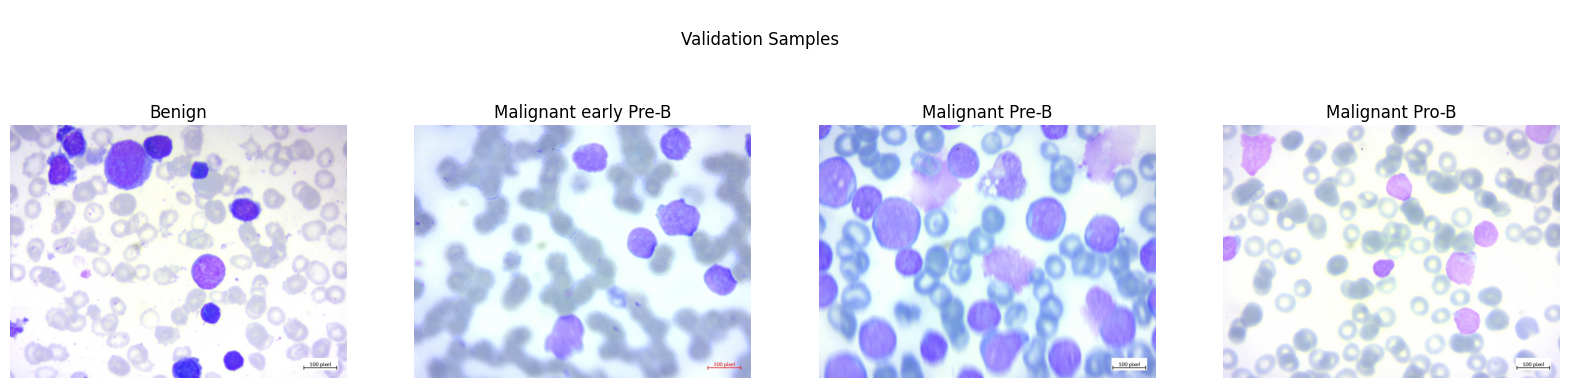

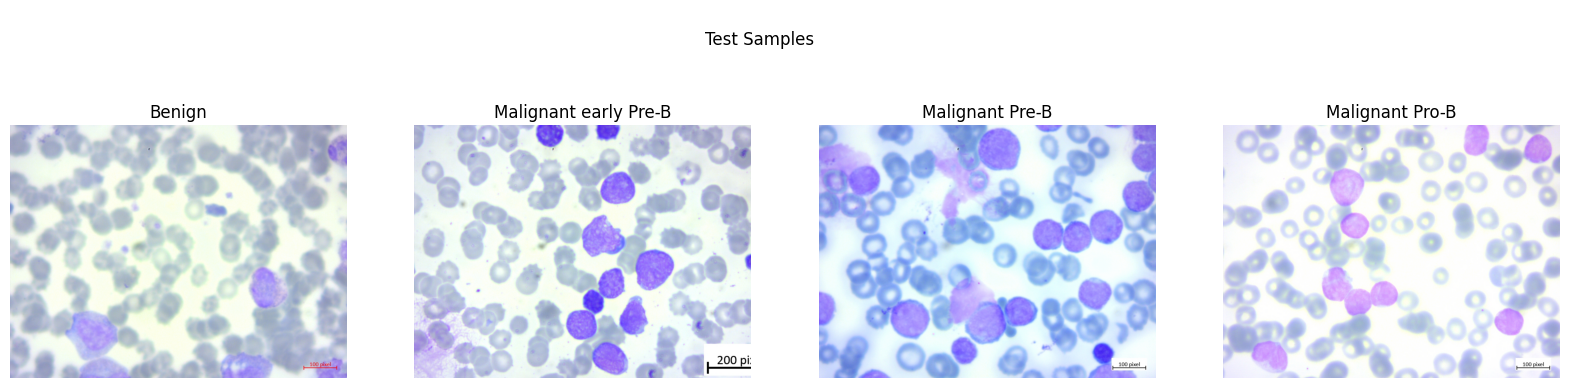

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to show sample images
def show_sample_images(sample_images, title):
    fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 5))
    fig.suptitle(title)
    for ax, (class_name, img_path) in zip(axes, sample_images.items()):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(class_name.replace('[Malignant] ', 'Malignant '))
        ax.axis('off')

show_sample_images(train_sample_images, 'Training Samples')
plt.show()

show_sample_images(val_sample_images, '\nValidation Samples')
plt.show()

show_sample_images(test_sample_images, '\nTest Samples')
plt.show()


---
**Create YAML file**

---

In [13]:
import yaml

# Contenido del archivo YAML
data = {
    #'path': '../datasets/BloodCellCancer', # Path to the dataset directory
    'train': 'train',
    'val': 'val',
    'test': 'test',
    'names': {
        0: 'Benign',
        1: 'Malignant early Pre-B',
        2: 'Malignant Pre-B',
        3: 'Malignant Pro-B'
    }
}

# Crear y escribir en el archivo blood_cell_cancer.yaml
with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("Archivo data.yaml creado exitosamente.")


Archivo data.yaml creado exitosamente.


---
**Install ultralytics library**

---

In [14]:
!pip install -q ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.0/869.0 kB 42.9 MB/s eta 0:00:00


---
**Load YOLO models Library**

---

In [15]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n-cls.pt')  # Puedes elegir diferentes versiones del modelo, como yolov8n-cls.pt, yolov8s-cls.pt, etc.

# Model Train
classification_train=model.train(data='BloodCellCancer', epochs=30, imgsz=224, batch=16, save=True)


100%|██████████| 5.31M/5.31M [00:00<00:00, 333MB/s]


Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=BloodCellCancer, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 6.25M/6.25M [00:00<00:00, 244MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/BloodCellCancer/train... 2268 images, 0 corrupt: 100%|██████████| 2268/2268 [00:06<00:00, 358.39it/s]

train: New cache created: /content/datasets/BloodCellCancer/train.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/BloodCellCancer/val... 648 images, 0 corrupt: 100%|██████████| 648/648 [00:01<00:00, 327.59it/s]

val: New cache created: /content/datasets/BloodCellCancer/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/30     0.539G      1.407         16        224:   5%|▍         | 7/142 [00:02<00:39,  3.44it/s]

       1/30     0.539G      1.404         16        224:   8%|▊         | 11/142 [00:03<00:41,  3.16it/s]
100%|██████████| 755k/755k [00:00<00:00, 72.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:14<00:00,  1.45it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:10<00:00,  1.92it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.77it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.71it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.68it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:10<00:00,  1.97it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30     0.396G    0.06026         12        224: 100%|██████████| 142/142 [00:47<00:00,  2.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:08<00:00,  2.40it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30     0.396G    0.08303         12        224: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30     0.394G    0.06233         12        224: 100%|██████████| 142/142 [00:45<00:00,  3.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.68it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30     0.396G    0.06589         12        224: 100%|██████████| 142/142 [00:53<00:00,  2.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:08<00:00,  2.48it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30     0.394G    0.05476         12        224: 100%|██████████| 142/142 [00:54<00:00,  2.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:13<00:00,  1.55it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30     0.396G    0.04355         12        224: 100%|██████████| 142/142 [00:44<00:00,  3.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:10<00:00,  1.99it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30     0.394G    0.06126         12        224: 100%|██████████| 142/142 [00:47<00:00,  2.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30     0.396G    0.04007         12        224: 100%|██████████| 142/142 [00:49<00:00,  2.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:13<00:00,  1.53it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30     0.394G    0.04371         12        224: 100%|██████████| 142/142 [00:46<00:00,  3.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.75it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30     0.396G    0.03987         12        224: 100%|██████████| 142/142 [00:47<00:00,  3.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30     0.394G    0.03865         12        224: 100%|██████████| 142/142 [00:53<00:00,  2.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.72it/s]

                   all      0.998          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


      21/30     0.396G    0.04089         12        224: 100%|██████████| 142/142 [00:55<00:00,  2.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30     0.394G    0.03903         12        224: 100%|██████████| 142/142 [00:48<00:00,  2.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30     0.396G    0.02865         12        224: 100%|██████████| 142/142 [00:44<00:00,  3.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.76it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30     0.394G    0.03648         12        224: 100%|██████████| 142/142 [00:48<00:00,  2.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.21it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30     0.396G    0.03297         12        224: 100%|██████████| 142/142 [00:48<00:00,  2.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:08<00:00,  2.44it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30     0.394G    0.02942         12        224: 100%|██████████| 142/142 [00:47<00:00,  2.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.69it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30     0.396G    0.02881         12        224: 100%|██████████| 142/142 [00:45<00:00,  3.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:11<00:00,  1.78it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30     0.396G    0.02737         12        224: 100%|██████████| 142/142 [00:48<00:00,  2.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30     0.396G    0.02247         12        224: 100%|██████████| 142/142 [00:48<00:00,  2.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30     0.394G    0.02657         12        224: 100%|██████████| 142/142 [00:46<00:00,  3.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:12<00:00,  1.70it/s]

                   all      0.998          1



30 epochs completed in 0.507 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/BloodCellCancer/train... found 2268 images in 4 classes ✅ 
val: /content/datasets/BloodCellCancer/val... found 648 images in 4 classes ✅ 
test: /content/datasets/BloodCellCancer/test... found 326 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:09<00:00,  2.16it/s]


                   all      0.998          1
Speed: 0.2ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


---
**Results directory**

---

In [16]:
print(classification_train.save_dir)

runs/classify/train


---
**Display training results**

---

In [17]:
classify_train_save_dir= classification_train.save_dir

print(os.listdir(classify_train_save_dir),'\n')

!ls -la {classify_train_save_dir}

['train_batch0.jpg', 'train_batch2.jpg', 'train_batch2842.jpg', 'weights', 'val_batch2_labels.jpg', 'val_batch0_pred.jpg', 'args.yaml', 'val_batch1_pred.jpg', 'confusion_matrix.png', 'confusion_matrix_normalized.png', 'val_batch2_pred.jpg', 'train_batch2841.jpg', 'train_batch1.jpg', 'events.out.tfevents.1723633386.8a8b08fa14ee.262.0', 'results.csv', 'train_batch2840.jpg', 'val_batch0_labels.jpg', 'val_batch1_labels.jpg', 'results.png'] 

total 2124
drwxr-xr-x 3 root root   4096 Aug 14 11:34 .
drwxr-xr-x 3 root root   4096 Aug 14 11:02 ..
-rw-r--r-- 1 root root   1537 Aug 14 11:02 args.yaml
-rw-r--r-- 1 root root 128856 Aug 14 11:33 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 123117 Aug 14 11:34 confusion_matrix.png
-rw-r--r-- 1 root root 130922 Aug 14 11:35 events.out.tfevents.1723633386.8a8b08fa14ee.262.0
-rw-r--r-- 1 root root   5952 Aug 14 11:33 results.csv
-rw-r--r-- 1 root root 111538 Aug 14 11:34 results.png
-rw-r--r-- 1 root root 139568 Aug 14 11:03 train_batch0.jpg
-

---
**Print results.csv**

---

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv(f'{classify_train_save_dir}/results.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())


                     epoch               train/loss    metrics/accuracy_top1  \
0                        1                  0.91879                  0.96142   
1                        2                  0.27085                  0.98148   
2                        3                  0.18844                  0.96914   
3                        4                  0.15036                  0.99074   
4                        5                  0.12055                  0.98148   

     metrics/accuracy_top5                 val/loss                   lr/pg0  \
0                        1                  0.83352                 0.000236   
1                        1                  0.77430                 0.000459   
2                        1                  0.77820                 0.000665   
3                        1                  0.76209                 0.000643   
4                        1                  0.76449                 0.000620   

                    lr/pg1            

---
**Print confusion matrix and confusion matrix normalized**

---

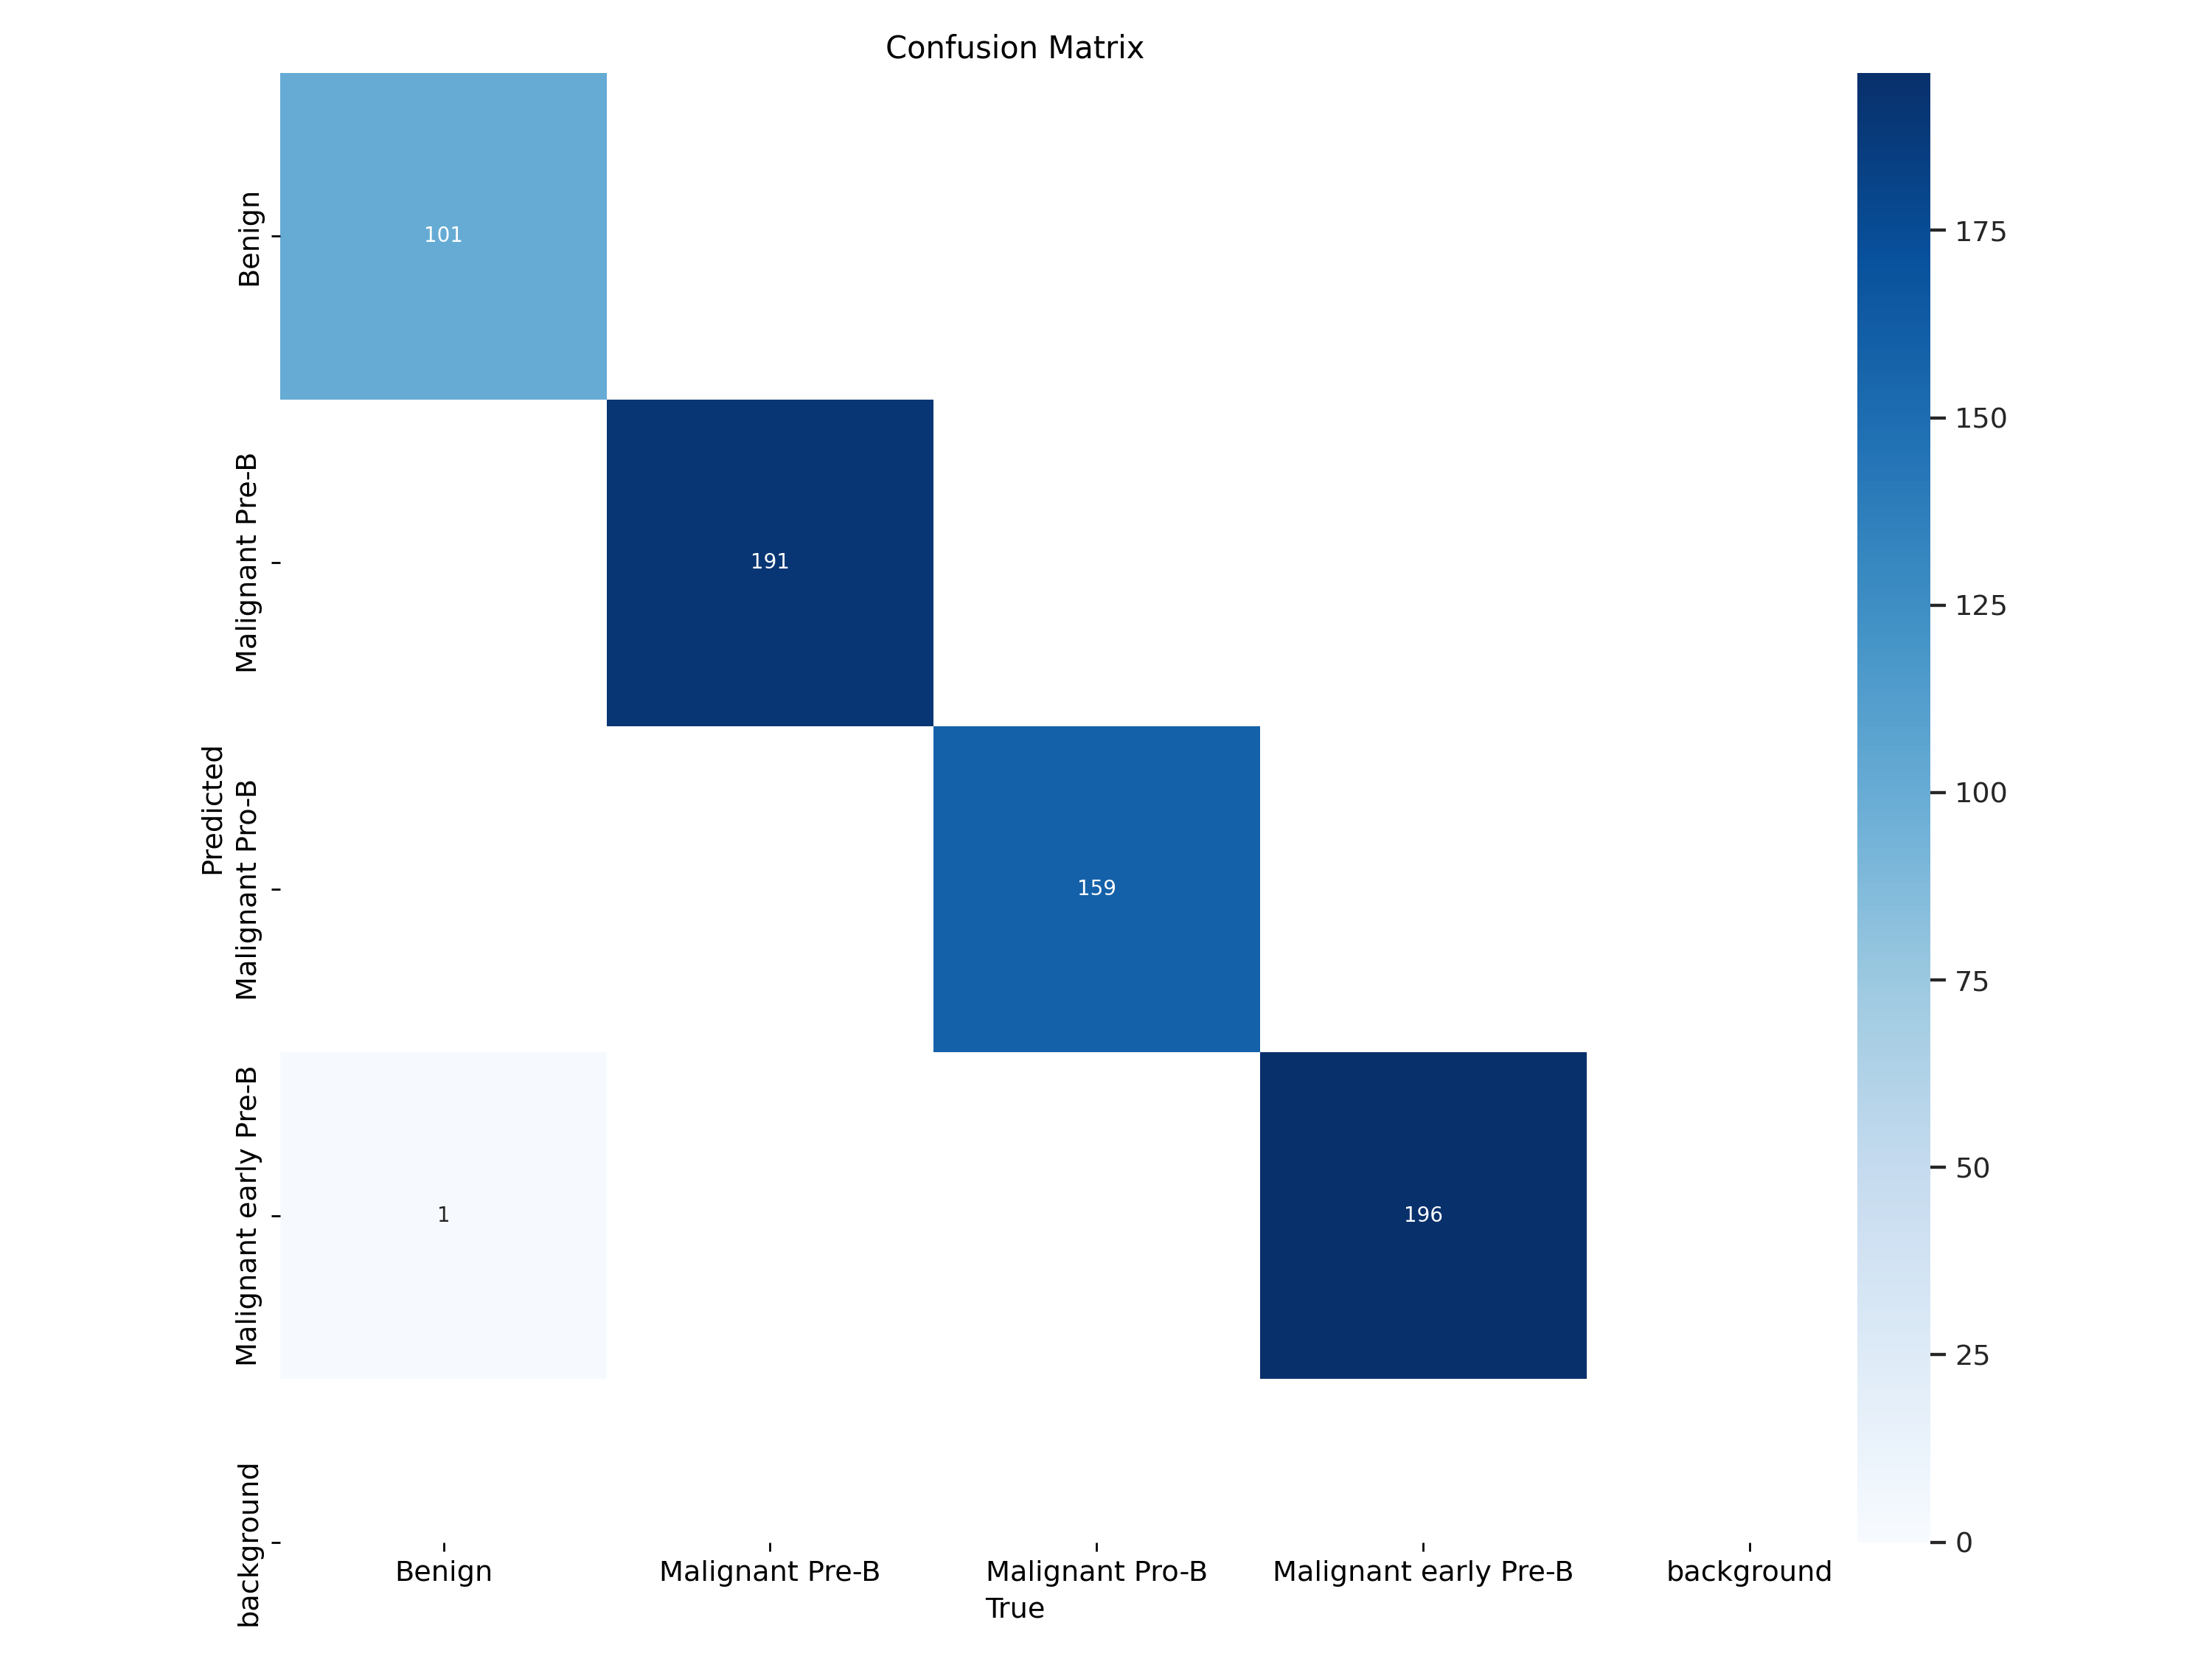

In [21]:
from IPython.display import display, Image

Image(filename=f'{classify_train_save_dir}/confusion_matrix.png',width=800)

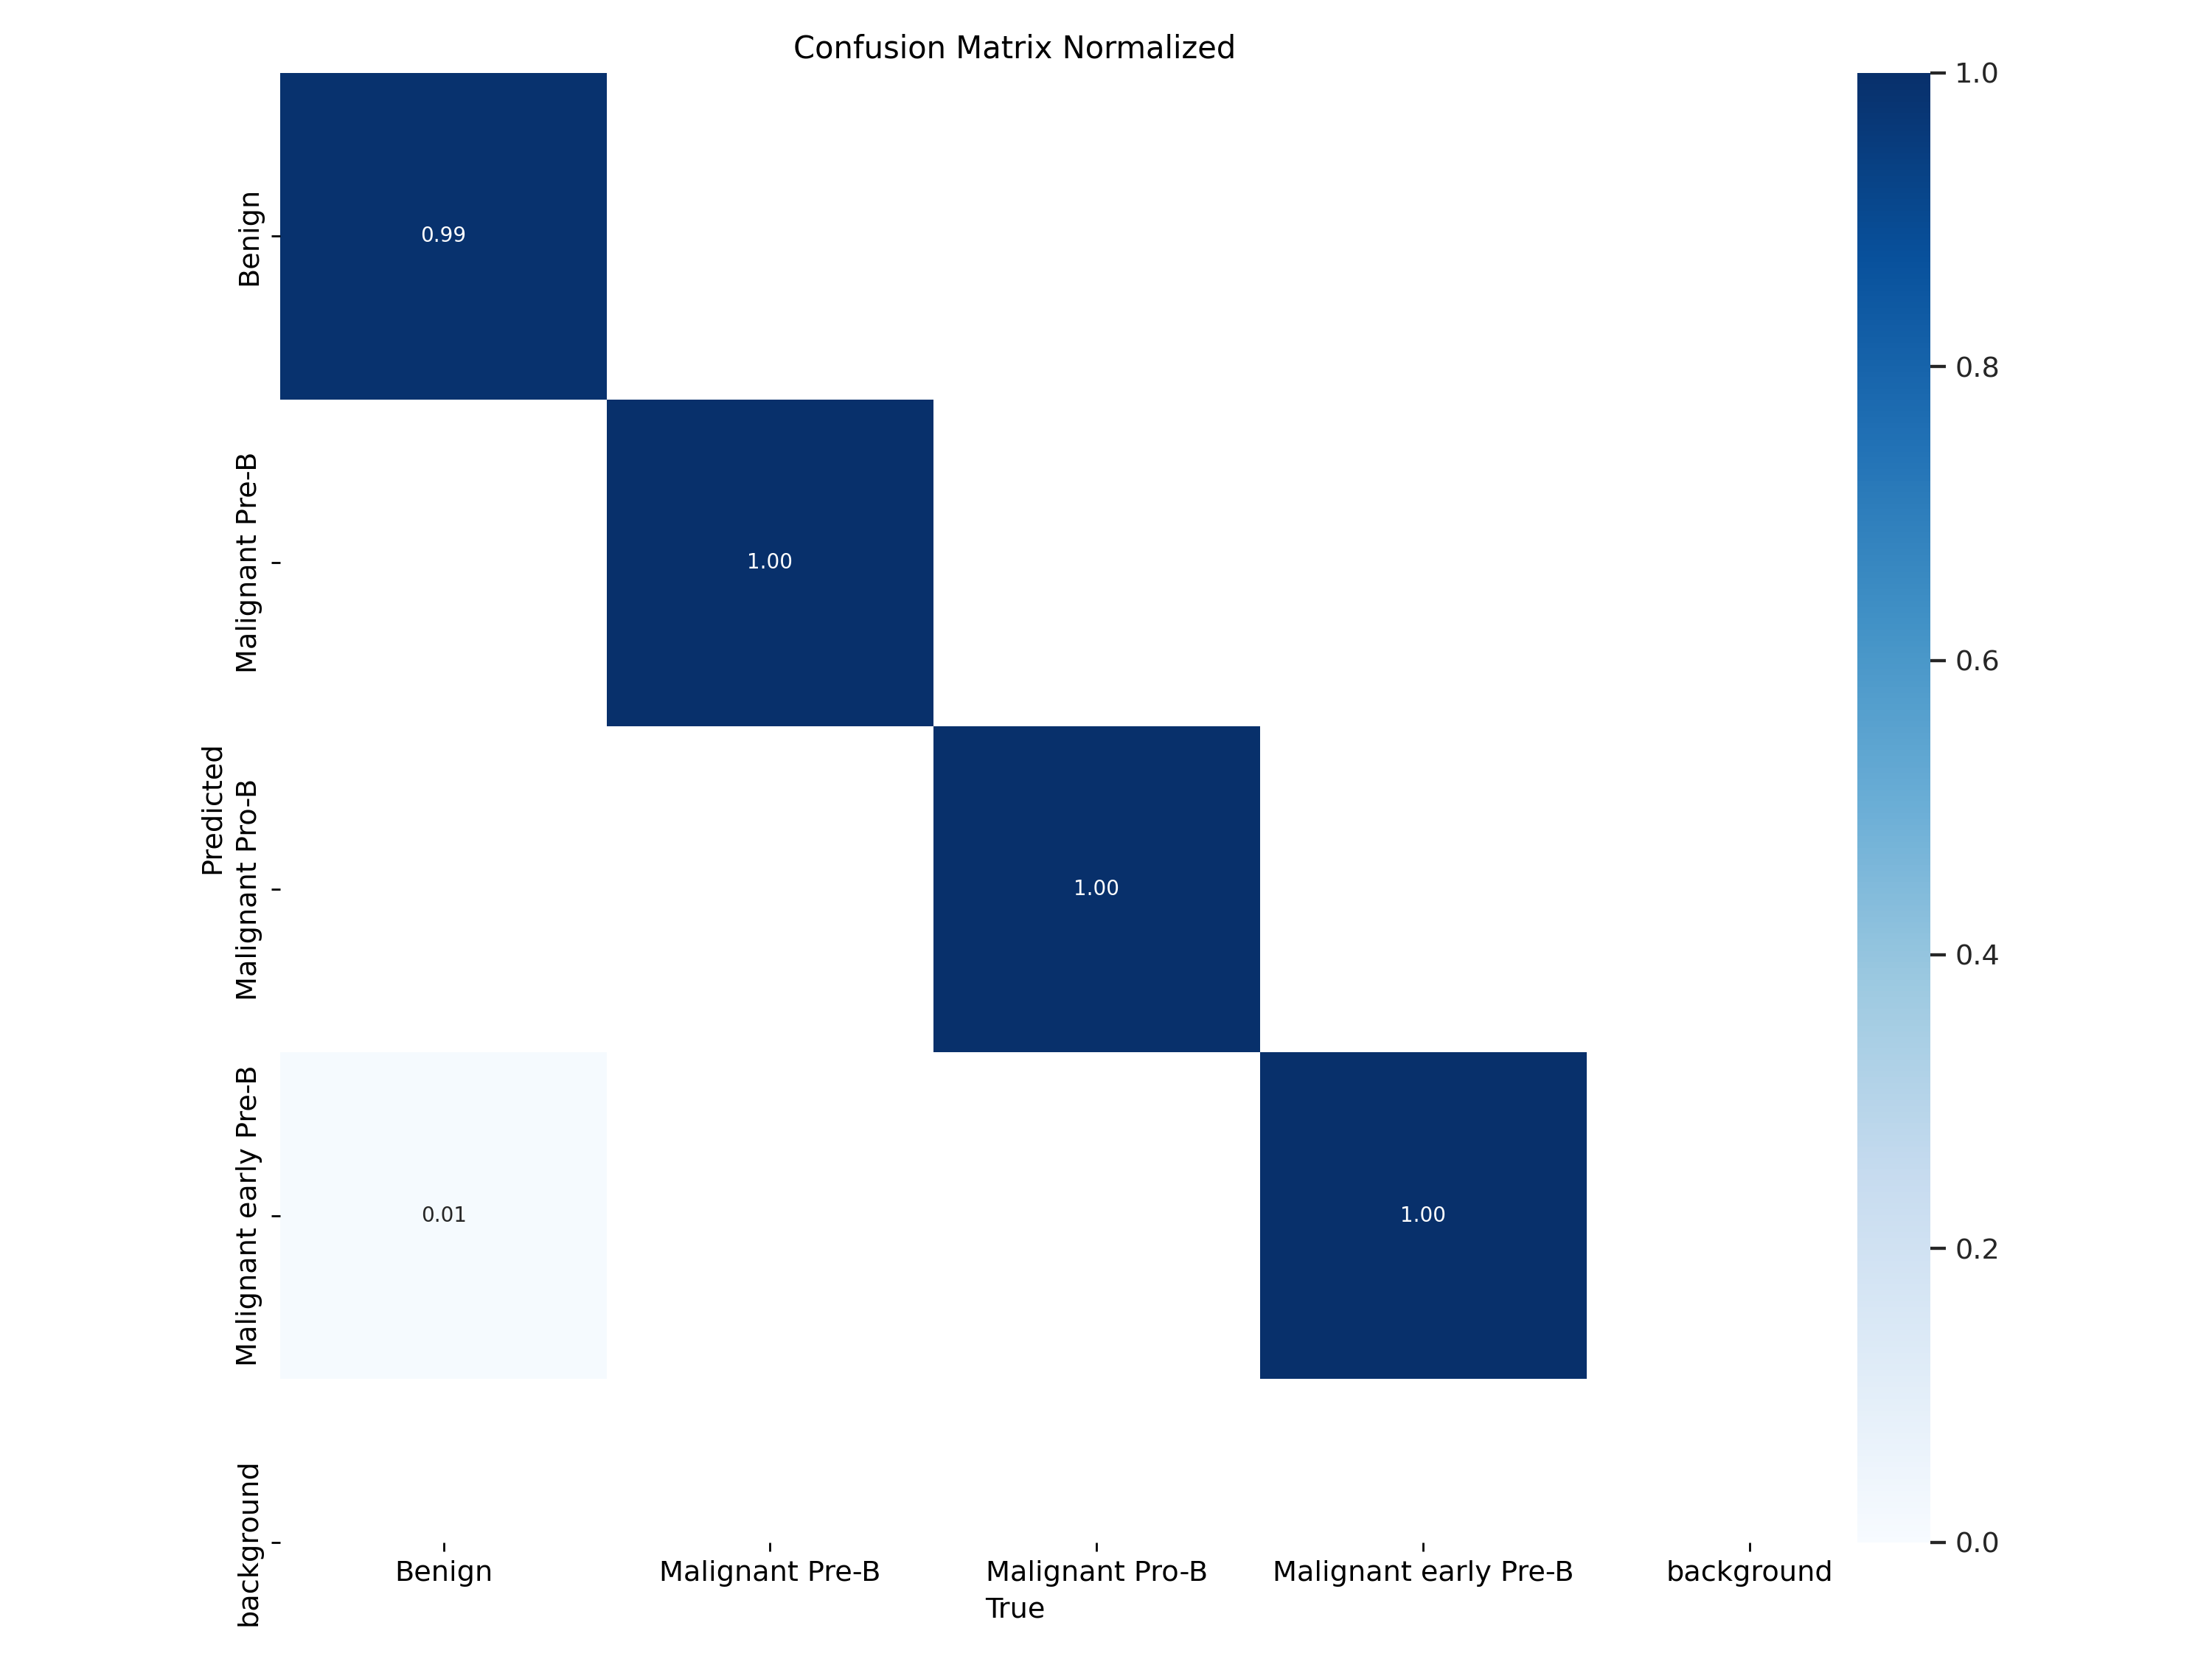

In [22]:
Image(filename=f'{classify_train_save_dir}/confusion_matrix_normalized.png',width=800)

---
**Print results (training curves, top1/top5)**

---

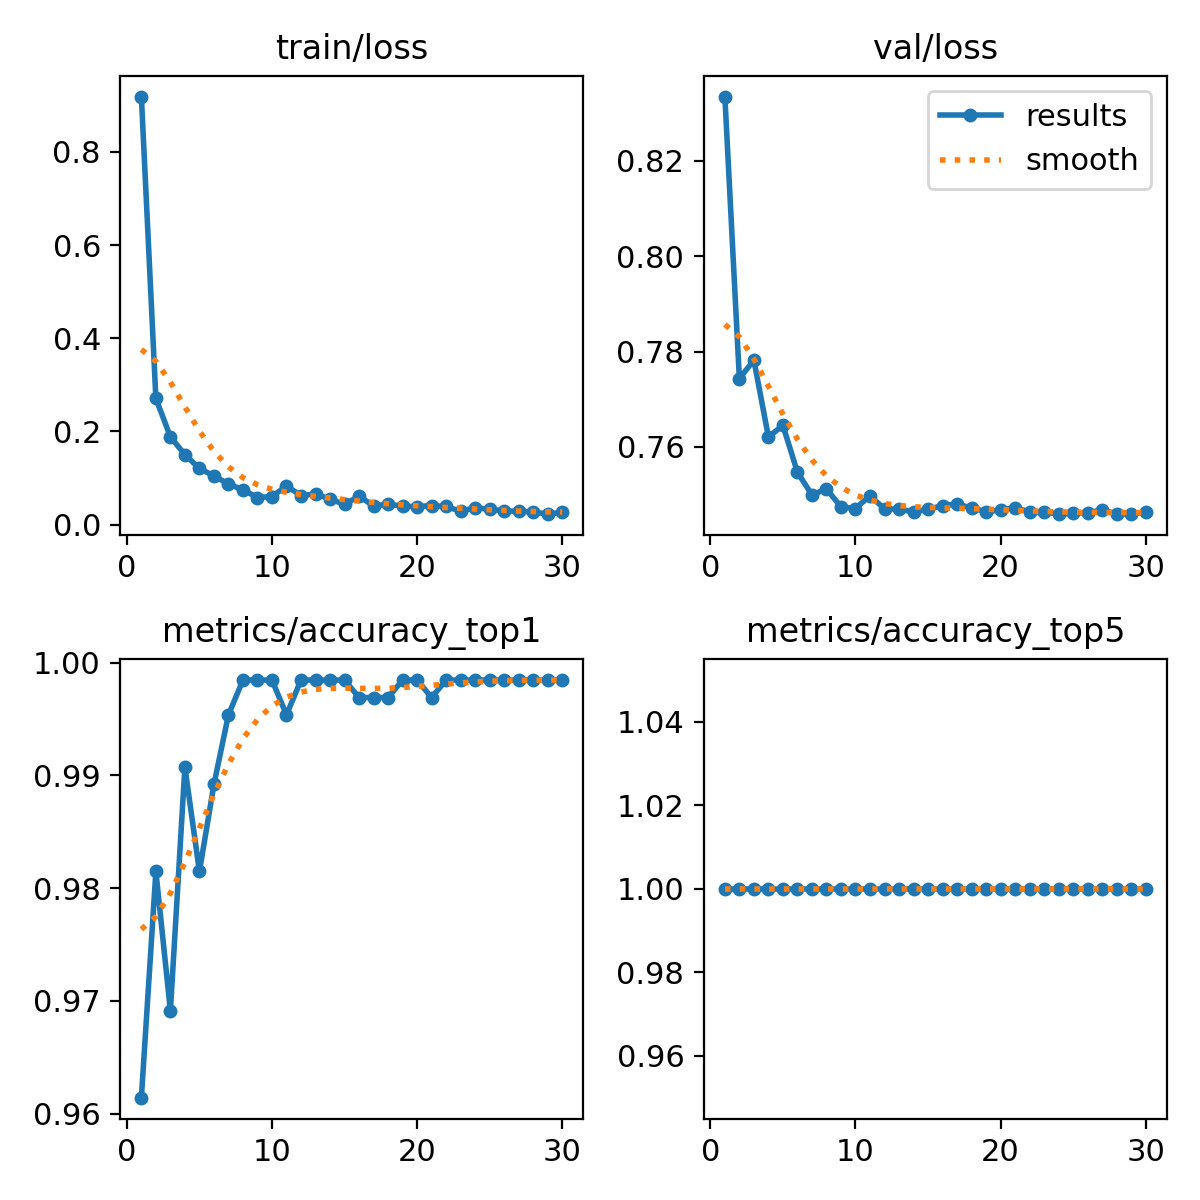

In [24]:
Image(filename=f'{classify_train_save_dir}/results.png',width=800)

---
**Display some examples (train_batch1)**

---

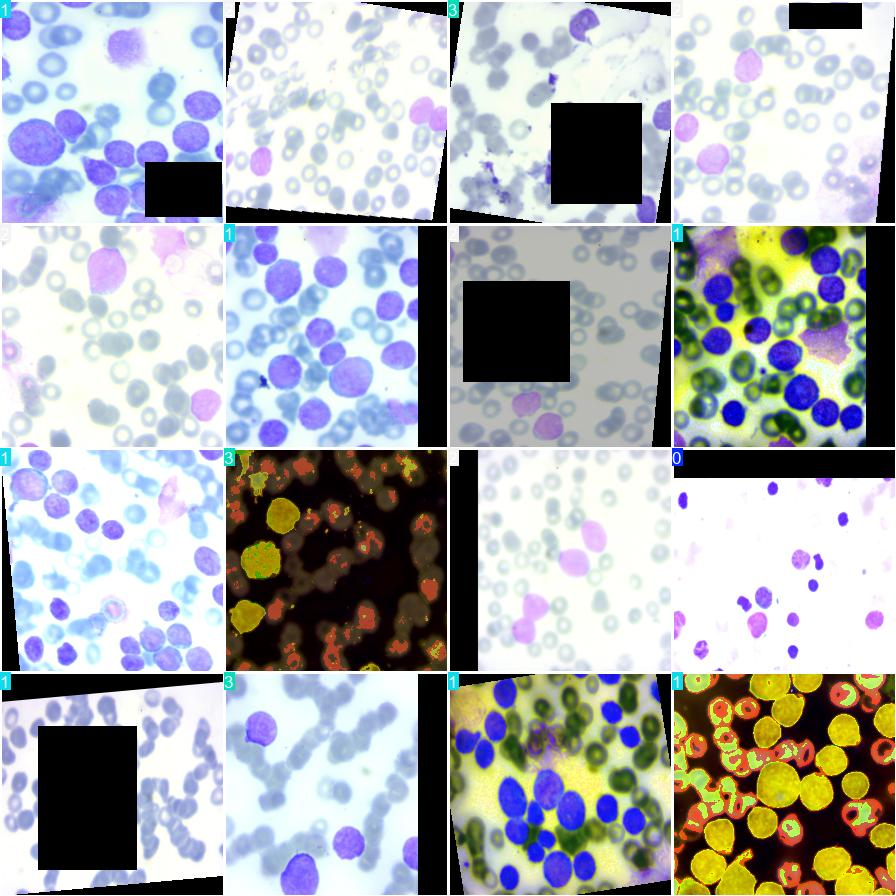

In [25]:
Image(filename=f'{classify_train_save_dir}/train_batch1.jpg',width=800)

---
**Display some example (val_batch1 labels vs pred_batch1 labels)**

---

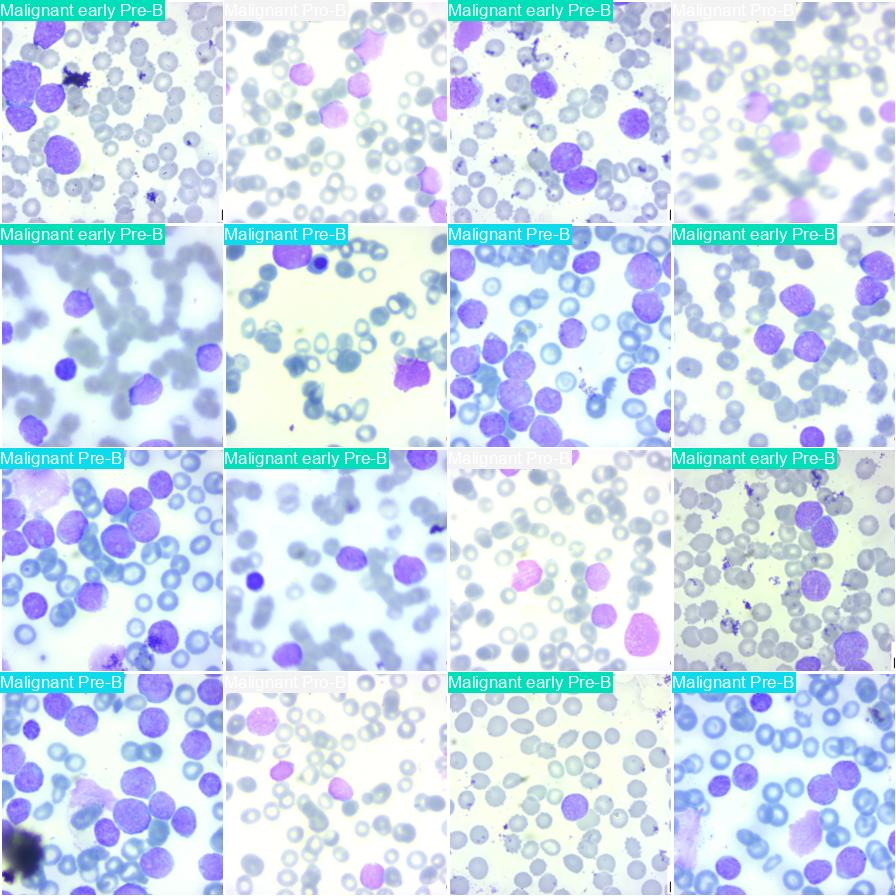

In [26]:
Image(filename=f'{classify_train_save_dir}/val_batch1_labels.jpg',width=800)

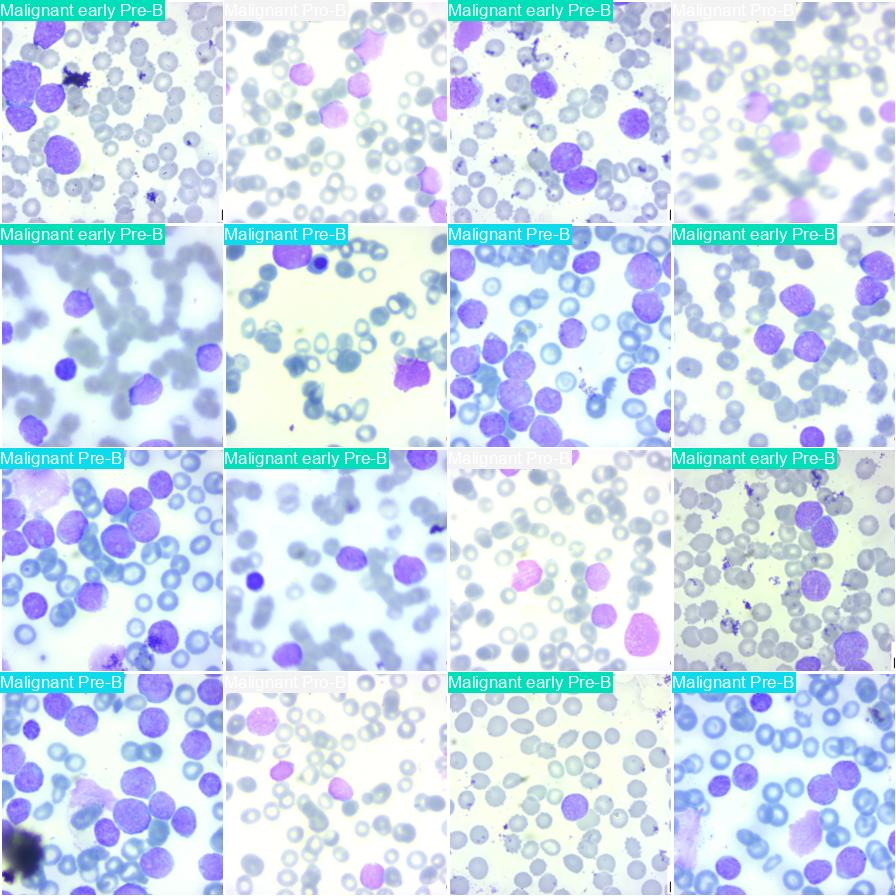

In [27]:
Image(filename=f'{classify_train_save_dir}/val_batch1_pred.jpg',width=800)

## 4. Validating (ULTRALYTICS YOLOv8)

In [ ]:
# Evaluate the model
metrics = model.val()

# Extract metrics
top1_accuracy = metrics.top1
top5_accuracy = metrics.top5
fitness = metrics.fitness
results_dict = metrics.results_dict

# Print metrics
print("Metrics:")
print(f"Top-1 Accuracy: {top1_accuracy}")
print(f"Top-5 Accuracy: {top5_accuracy}")
print(f"Fitness: {fitness}")
print(f"Results Dictionary: {results_dict}")
print(f"Confusion Matrix Path: {metrics.save_dir / 'confusion_matrix.png'}")


# Make predictions on new images
results = model('/content/BloodCellCancer/val/Benign/Sap_013 (1).jpg')
print(results)


Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/BloodCellCancer/train... found 2268 images in 4 classes ✅ 
val: /content/BloodCellCancer/val... found 648 images in 4 classes ✅ 
test: /content/BloodCellCancer/test... found 326 images in 4 classes ✅ 


val: Scanning /content/BloodCellCancer/val... 648 images, 0 corrupt: 100%|██████████| 648/648 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]


                   all          1          1
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train42
Metrics:
Top-1 Accuracy: 1.0
Top-5 Accuracy: 1.0
Fitness: 1.0
Results Dictionary: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
Confusion Matrix Path: runs/classify/train42/confusion_matrix.png

image 1/1 /content/BloodCellCancer/val/Benign/Sap_013 (1).jpg: 224x224 Benign 1.00, Malignant early Pre-B 0.00, Malignant Pro-B 0.00, Malignant Pre-B 0.00, 4.5ms
Speed: 28.0ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Benign', 1: 'Malignant Pre-B', 2: 'Malignant Pro-B', 3: 'Malignant early Pre-B'}
obb: None
orig_img: array([[[253, 234, 243],
        [255, 239, 248],
        [255, 238, 247],
        ...,
        [254, 240, 252],
        [255, 245, 253

---
**Confusion Matrix**

---

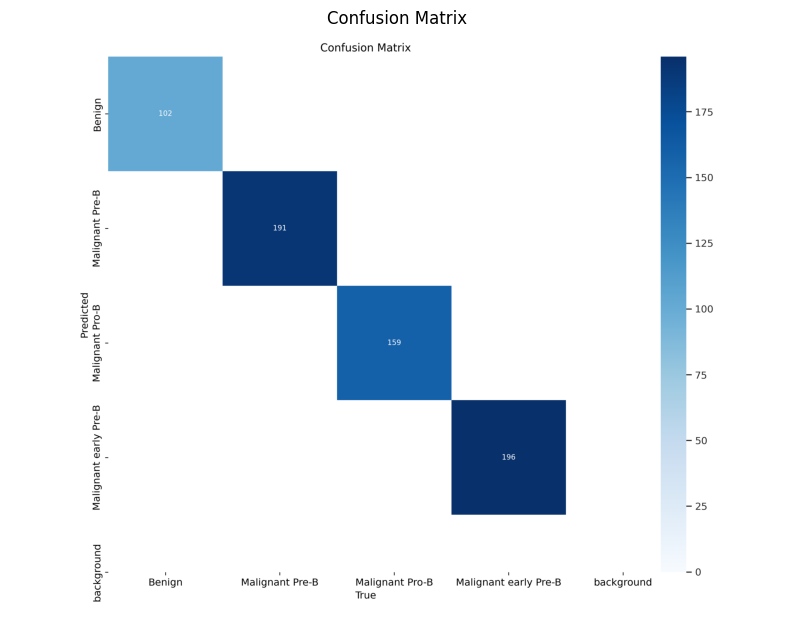

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
confusion_matrix_image = Image.open(f'{metrics.save_dir}/confusion_matrix.png')

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_image)
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()


---
**Confusion Matrix Normalized**

---

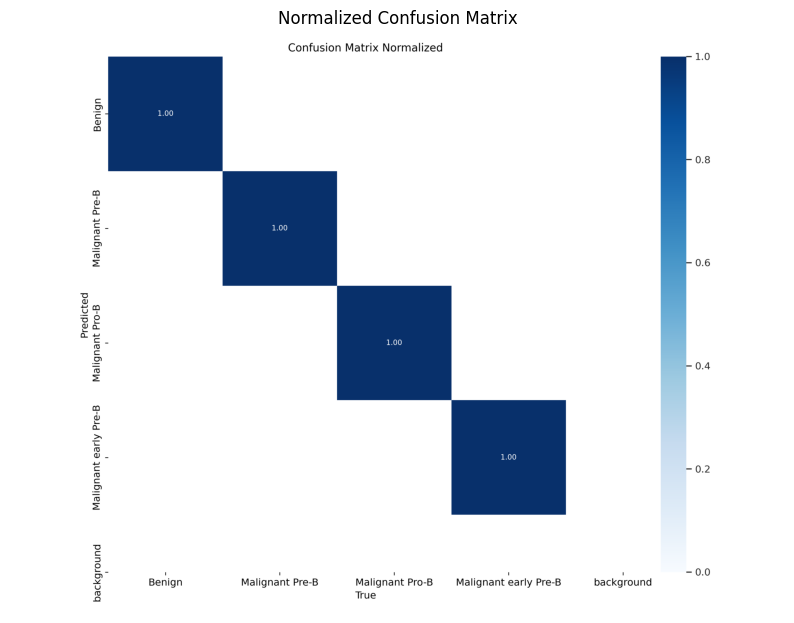

In [ ]:

# Load the image
confusion_matrix_normalized_image = Image.open(f'{metrics.save_dir}/confusion_matrix_normalized.png')


# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_normalized_image)
plt.axis('off')
plt.title('Confusion Matrix Normalized')
plt.show()


## `NOTEBOOK PRACTICE 13`

---
Modify the baseline notebook to get better performance.

---

### Instructions to Improve the Notebook (study and work about it by yourself):

ChatGPT can be your great allied. Use it for your convenence.

You can use a model different from nano. You can use a diferent number of epochs, batch, image size, etc.

Feel free to modify and adapt the practice as needed to suit your learning objectives and preferences.

Happy coding!